In [27]:
from pesummary.gw.file.read import read
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from dingo.gw.noise.asd_dataset import ASDDataset
from dingo.gw.domains import build_domain

In [34]:
# this takes 3 minutes
fn = "../../../data/01_events/GW190425/posterior_samples.h5"
data = read(fn)
psd = data.psd["PhenomPNRT-HS"]
asds_190425 = {k: v[:,1] ** 0.5 for k, v in psd.items()}
f_190425 = {k: v[:,0] for k, v in psd.items()}

2023-04-11  09:17:51 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-04-11  09:17:51 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2023-04-11  09:17:51 PESummary WARNING : Could not find minimum frequency in input file and one was not passed from the command line. Using 20.0Hz as default
2023-04-11  09:17:51 PESummary INFO    : chi_p = 0 for all samples. Treating this as a non-precessing system
2023-04-11  09:17:51 PESummary INFO    : Skipping remnant calculations as tidal deformability parameters found in the posterior table.
2023-04-11  09:18:19 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2023-04-11  09:18:19 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz a

In [39]:
asd_dataset = ASDDataset(file_name="../../../data/02_asds/asds_O3_smooth_fiducial.hdf5")
asds_syn = asd_dataset.sample_random_asds()

Loading dataset from ../../../data/02_asds/asds_O3_smooth_fiducial.hdf5.


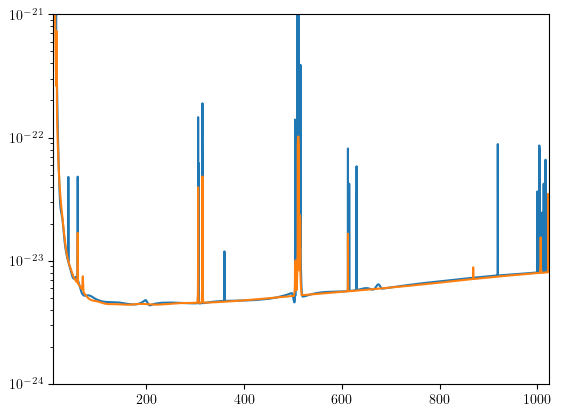

In [40]:
plt.plot(f_190425["L1"], asds_190425["L1"])
plt.plot(asd_dataset.domain(), asds_syn["L1"])
plt.xlim((10,1024))
plt.ylim((1e-24,1e-21))
plt.yscale("log")
plt.show()

In [41]:
mfd_settings = {
    "type": "MultibandedFrequencyDomain",
    "bands": [
        [20.001953125, 20.462890625, 0.0078125],
        [20.474609375, 28.240234375, 0.015625],
        [28.263671875, 37.107421875, 0.03125],
        [37.154296875, 50.591796875, 0.0625],
        [50.685546875, 62.185546875, 0.125],
        [62.373046875, 114.623046875, 0.25],
        [114.998046875, 234.498046875, 0.5],
        [235.248046875, 389.248046875, 1.0],
        [390.748046875, 1022.748046875, 2.0],
    ],
    "base_domain": {
        "type": "FrequencyDomain",
        "f_min": 20.0,
        "f_max": 1024.0,
        "delta_f": 0.00390625,
    }
}
mfd = build_domain(mfd_settings)
ufd = mfd.base_domain

In [44]:
asds_190425_ufd = {}
asds_syn_ufd = {}
for ifo in asds_190425.keys():
    asds_190425_ufd[ifo] = interp1d(f_190425[ifo], asds_190425[ifo])(ufd())
    asds_syn_ufd[ifo] = interp1d(asd_dataset.domain, asds_syn[ifo])(ufd())

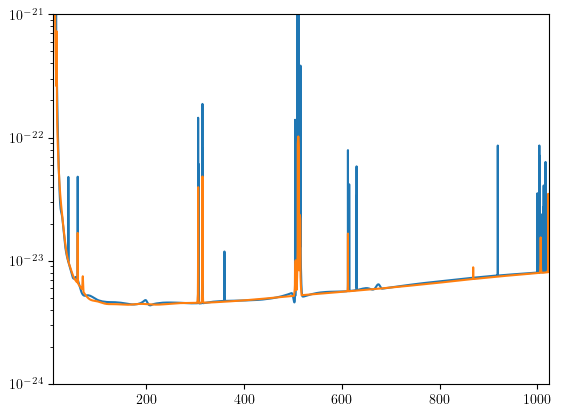

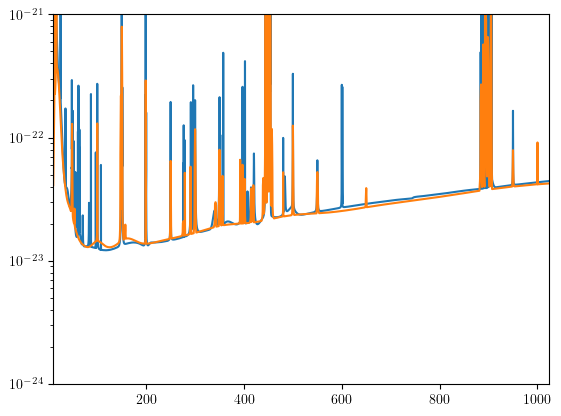

In [50]:
for ifo in asds_190425_ufd.keys():
    plt.plot(ufd(), asds_190425_ufd[ifo])
    plt.plot(ufd(), asds_syn_ufd[ifo])
    plt.xlim((10,1024))
    plt.ylim((1e-24,1e-21))
    plt.yscale("log")
    plt.show()

In [52]:
# decimated ASDs
asds_190425_dec_naive = {k: mfd.decimate(v) for k, v in asds_190425_ufd.items()}
asds_190425_dec_inv = {k: 1 / mfd.decimate(1 / v) for k, v in asds_190425_ufd.items()}

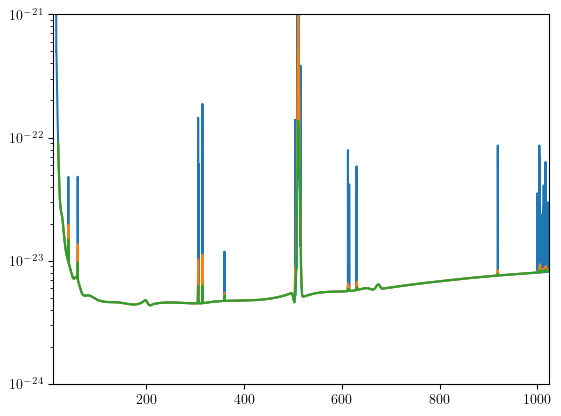

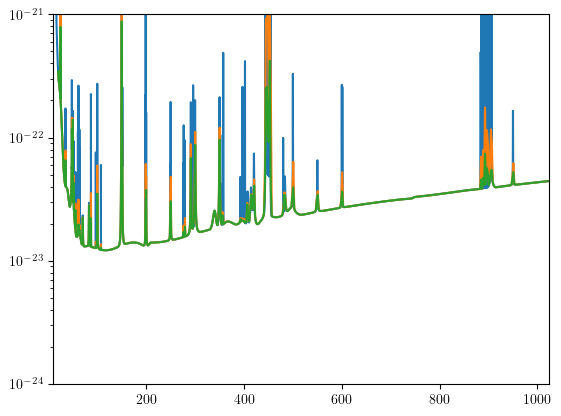

In [53]:
for ifo in asds_190425_ufd.keys():
    plt.plot(ufd(), asds_190425_ufd[ifo])
    plt.plot(mfd(), asds_190425_dec_naive[ifo])
    plt.plot(mfd(), asds_190425_dec_inv[ifo])
    plt.xlim((10,1024))
    plt.ylim((1e-24,1e-21))
    plt.yscale("log")
    plt.show()